In [12]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans

In [13]:
# Load Cleaned Dataset
df = pd.read_csv (r"C:\Users\darre\DataProjects\data\cleaned_ecommerce_data.csv")

# Derive TotalPrice and YearMonth
df['TotalPrice'] = df['price'] * df['order_item_id']
df['YearMonth'] = pd.to_datetime(df['order_purchase_timestamp']).dt.to_period('M').astype(str)

# Display first few rows
print(df.head())

   Unnamed: 0                          order_id  \
0           0  e481f51cbdc54678b7cc49136f2d6af7   
1           1  53cdb2fc8bc7dce0b6741e2150273451   
2           2  47770eb9100c2d0c44946d9cf07ec65d   
3           3  949d5b44dbf5de918fe9c16f97b45f8a   
4           4  ad21c59c0840e6cb83a9ceb5573f8159   

                        customer_id order_status order_purchase_timestamp  \
0  9ef432eb6251297304e76186b10a928d    delivered      2017-10-02 10:56:33   
1  b0830fb4747a6c6d20dea0b8c802d7ef    delivered      2018-07-24 20:41:37   
2  41ce2a54c0b03bf3443c3d931a367089    delivered      2018-08-08 08:38:49   
3  f88197465ea7920adcdbec7375364d82    delivered      2017-11-18 19:28:06   
4  8ab97904e6daea8866dbdbc4fb7aad2c    delivered      2018-02-13 21:18:39   

     order_approved_at order_delivered_carrier_date  \
0  2017-10-02 11:07:15          2017-10-04 19:55:00   
1  2018-07-26 03:24:27          2018-07-26 14:31:00   
2  2018-08-08 08:55:23          2018-08-08 13:50:00   
3  2017-11

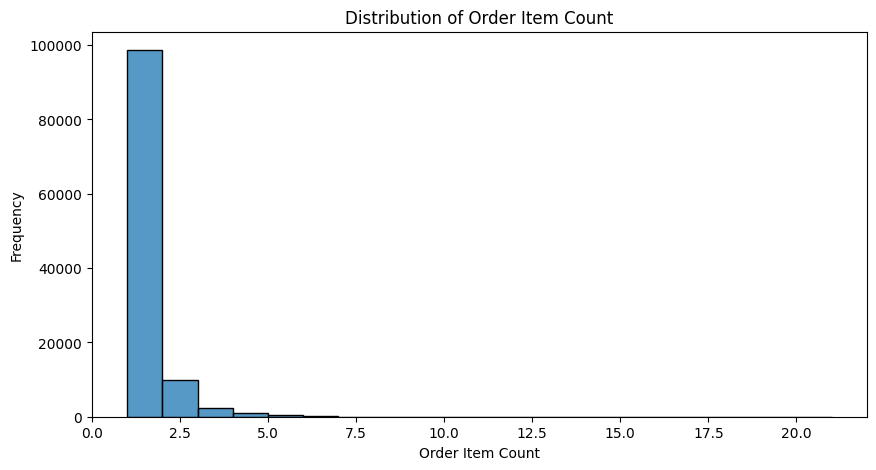

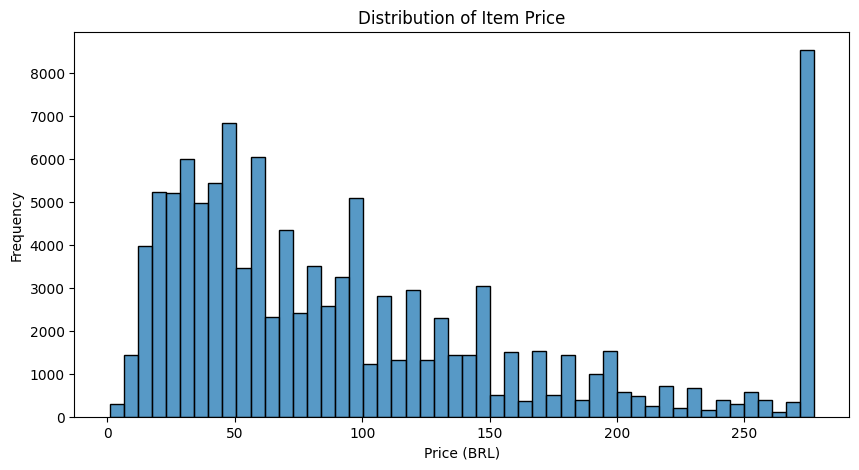

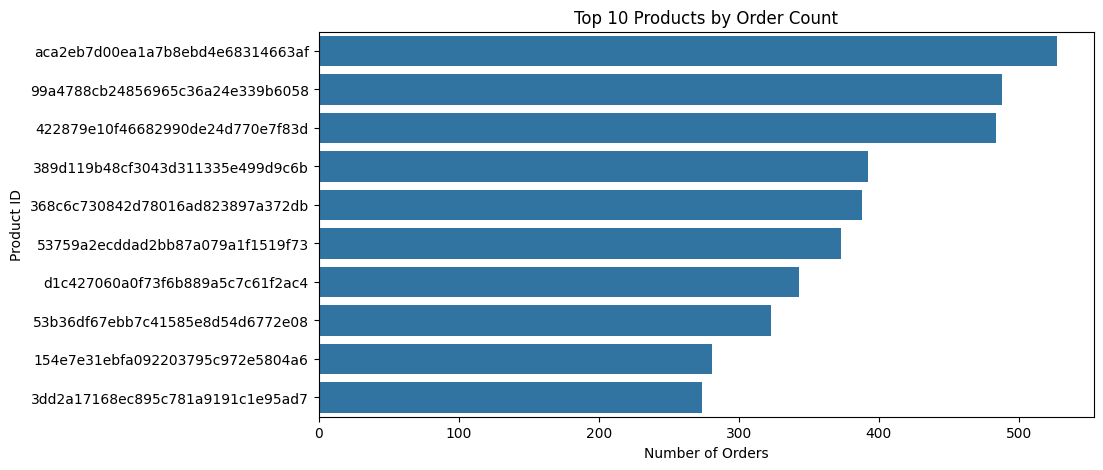

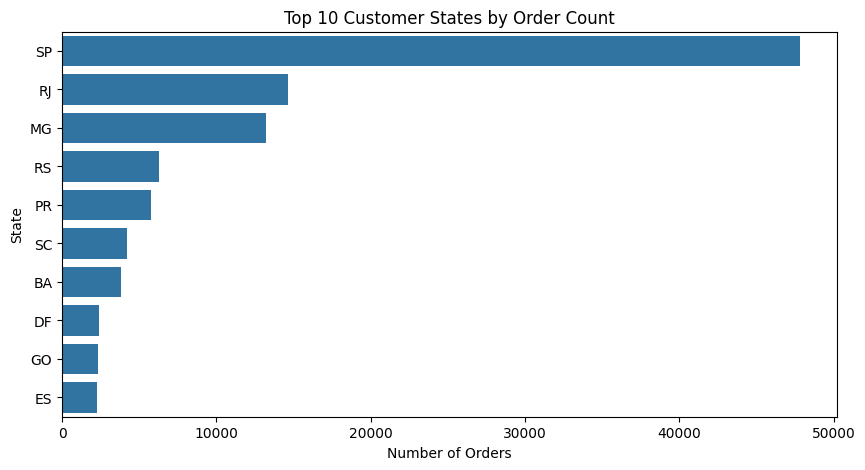

In [14]:
# Analysis of distributions and categorical variables for individual column characteristics
# Distribution of Quantity (order_item_id)
plt.figure(figsize=(10,5))
sns.histplot(df['order_item_id'], bins=20)
plt.title('Distribution of Order Item Count')
plt.xlabel('Order Item Count')
plt.ylabel('Frequency')
plt.savefig(r"C:\Users\darre\DataProjects\outputs\order_item_distribution.png")
plt.show()

# Distribution of UnitPrice
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50)
plt.title('Distribution of Item Price')
plt.xlabel('Price (BRL)')
plt.ylabel('Frequency')
plt.savefig(r"C:\Users\darre\DataProjects\outputs\price_distribution.png")
plt.show()

# 3. Categorical: Top 10 products (product_id)
top_products = df['product_id'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('Product ID')
plt.savefig('../outputs/top_products.png')
plt.show()

# 4. Categorical: Orders by customer_state
top_states = df['customer_state'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 10 Customer States by Order Count')
plt.xlabel('Number of Orders')
plt.ylabel('State')
plt.savefig('../outputs/top_states.png')
plt.show()

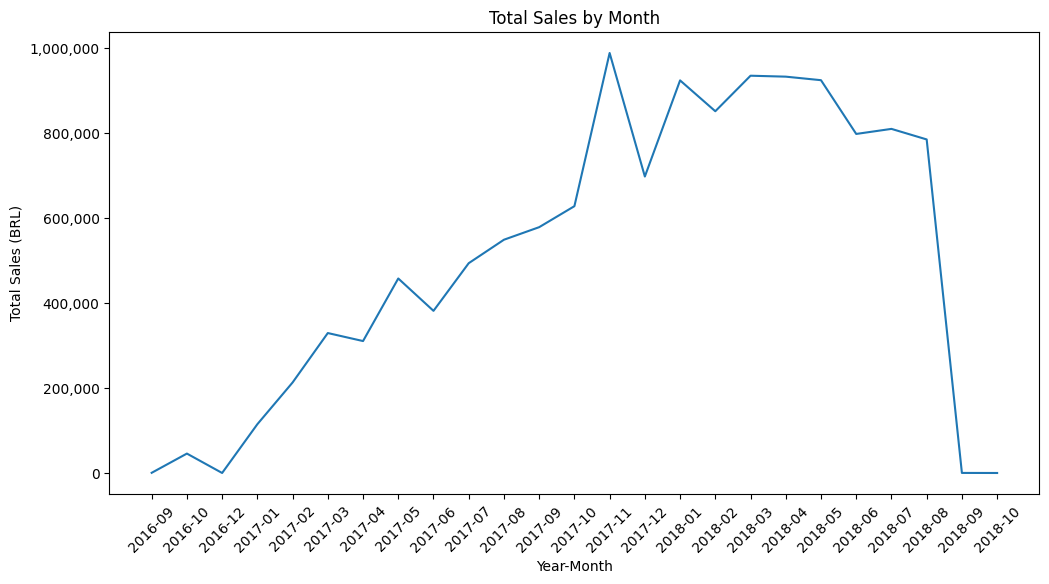

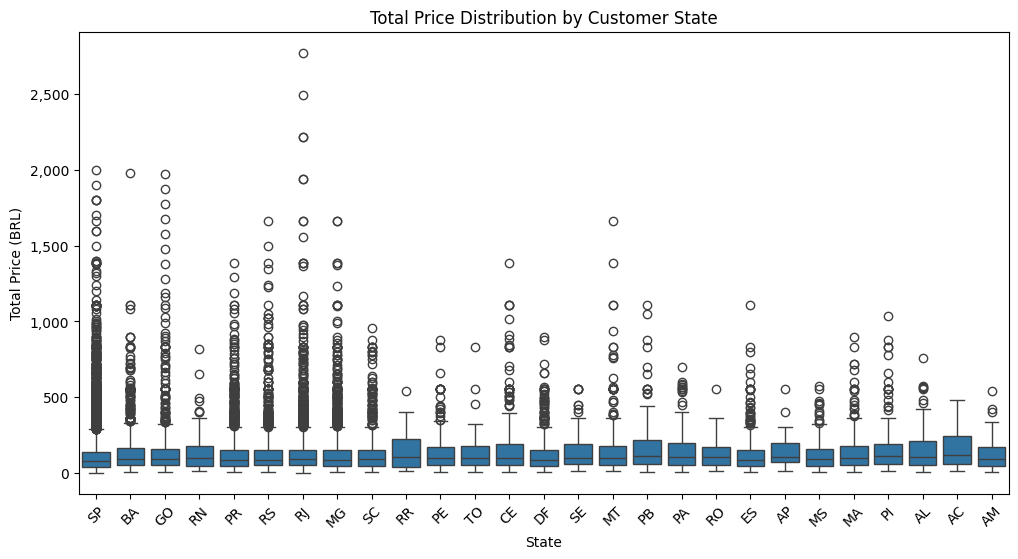

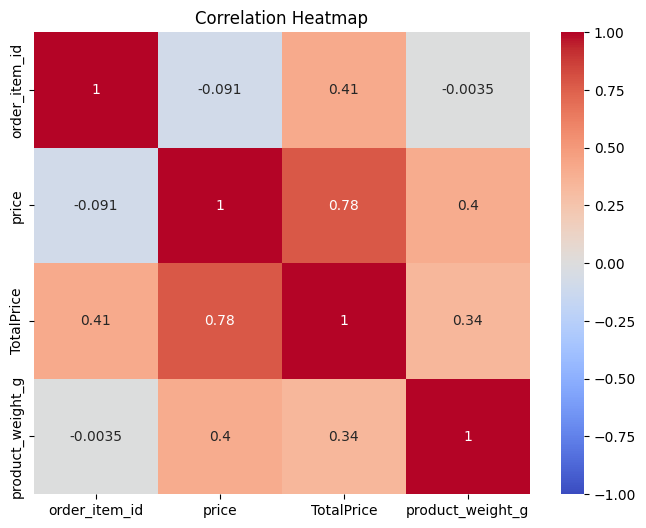

In [15]:
# Explore relationships between variables
# Sales by Time (TotalPrice by YearMonth)
monthly_sales = df.groupby('YearMonth')['TotalPrice'].sum().reset_index()
plt.figure(figsize=(12,6))
sns.lineplot(x='YearMonth', y='TotalPrice', data=monthly_sales)
plt.title('Total Sales by Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales (BRL)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y') # Disables scientific notation
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format as integers with commas
plt.savefig(r"C:\Users\darre\DataProjects\outputs\sales_trend.png")
plt.show()

# TotalPrice by Customer State - unchanged
plt.figure(figsize=(12, 6))
sns.boxplot(x='customer_state', y='TotalPrice', data=df)
plt.title('Total Price Distribution by Customer State')
plt.xlabel('State')
plt.ylabel('Total Price (BRL)')
plt.xticks(rotation=45)
plt.ticklabel_format(style='plain', axis='y')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.savefig(r'C:\Users\darre\DataProjects\outputs\total_price_by_stae.png')
plt.show()

# Correlation Heatmap
corr = df[['order_item_id', 'price', 'TotalPrice', 'product_weight_g']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.savefig(r"C:\Users\darre\DataProjects\outputs\correlation_heatmap.png")
plt.show()

In [16]:
# T-test: Compare average TotalPrice for SP vs. others
sp_orders = df[df['customer_state'] == 'SP']['TotalPrice']
other_orders = df[df['customer_state'] != 'SP']['TotalPrice']
t_stat, p_value = stats.ttest_ind(sp_orders.dropna(), other_orders.dropna())
print(f"T-test (SP vs Others): t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in average TotalPrice between SP and other states.")
else:
    print("No significant difference in average TotalPrice between SP and other states.")

T-test (SP vs Others): t-statistic = -18.82, p-value = 0.0000
Significant difference in average TotalPrice between SP and other states.


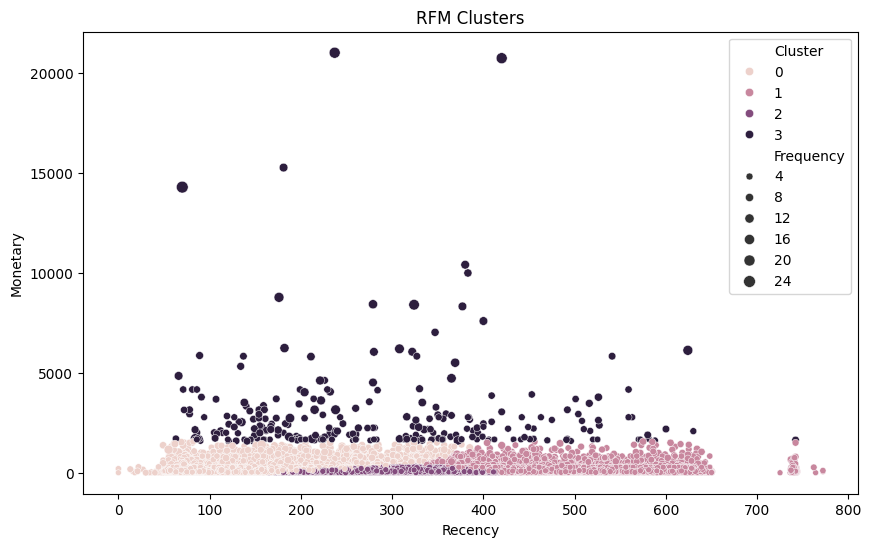

Cluster Summary:
         Recency  Frequency  Monetary
Cluster                              
0         138.76       1.24    157.42
1         499.52       1.18    135.08
2         292.18       1.09     86.26
3         280.87       5.90   2962.08

Cluster Counts:
Cluster_Name
At-Risk (High Recency, Low Frequency)          35948
VIP (Recent, Frequent, High Spend)             35599
Loyal (Moderate Recency, High Frequency)       24296
New/Low-Value (Recent, Low Frequency/Spend)      253
Name: count, dtype: int64


In [28]:
# RFM Analysis
# Recency: Days since last purchase
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
latest_date = df['order_purchase_timestamp'].max() # Date of the latest purchase for reference point
rfm = df.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (latest_date - x.max()).days, # Recency
    'order_id': 'count', # Frequency
    'TotalPrice': 'sum'
}).rename(columns={
    'order_purchase_timestamp': 'Recency',
    'order_id': 'Frequency',
    'TotalPrice': 'Monetary'
})

# Quantiles for RFM scores
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1], duplicates='drop') # Higher score for lower recency
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1, 2, 3, 4], duplicates='drop')
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1, 2, 3, 4], duplicates='drop')

# KMeans Clustering
rfm_numeric = rfm[['Recency', 'Frequency', 'Monetary']]
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_numeric)

# Name clusters based on RFM means
cluster_summary = rfm.groupby('Cluster')[['Recency','Frequency','Monetary']].mean()
cluster_names= {
    0: 'VIP (Recent, Frequent, High Spend)',
    1: 'Loyal (Moderate Recency, High Frequency)',
    2: 'At-Risk (High Recency, Low Frequency)',
    3: 'New/Low-Value (Recent, Low Frequency/Spend)'
}
rfm['Cluster_Name'] = rfm['Cluster'].map(cluster_names)

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', size='Frequency', data=rfm)
plt.title('RFM Clusters')
plt.savefig('../outputs/rfm_clusters.png')
plt.show()

# Summary of clusters
print('Cluster Summary:')
print(rfm.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean().round(2))
print("\nCluster Counts:")
print(rfm['Cluster_Name'].value_counts())